In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
import mpl_toolkits.mplot3d
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [5]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [25]:
path = "/content/drive/MyDrive/data/Cancer_Data.csv"
data = pd.read_csv(path)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Датасет про рак молочной железы


---


1. **id**

2. **diagnosis**: указывает на тип рака («M» (злокачественный) или «B» (доброкачественный))

3. **radius_mean**, **texture_mean**, **perimeter_mean**, **area_mean**, **smoothness_mean**, **compactness_mean**, **concavity_mean**, **concave points_mean**: средние значения визуальных характеристик опухоли.

In [12]:
# общая инфа
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [34]:
# убираем пустую строку
data.drop('Unnamed: 32', axis=1, inplace=True)

In [35]:
# смотрим какие есть классы
vals = data['diagnosis'].unique()
vals

array(['M', 'B'], dtype=object)

In [36]:
data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


В (доброкачественные) содержит 357 записей

М (злокачественные) содержит 212 записей

In [39]:
# делим на x y
X = data.drop(labels='diagnosis', axis=1)
y = data['diagnosis'].replace({'M':0, 'B':1})
yvals = data['diagnosis']

<ipython-input-39-62dcfd8c95fd>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = data['diagnosis'].replace({'M':0, 'B':1})


In [40]:
# нормализуем это всё
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Метод главных компонентов (Principal Component Analysis, PCA)

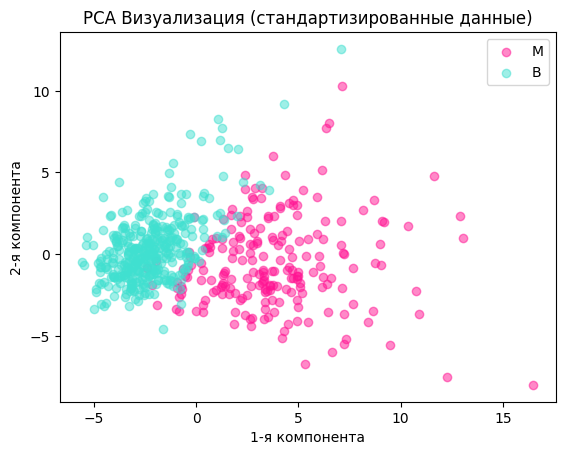

In [44]:
colors = ['deeppink', 'turquoise']
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


for i, label in enumerate(vals):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                c=colors[i], label=label, alpha=0.5)

plt.title('РСА Визуализация (стандартизированные данные)')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel('1-я компонента')
plt.ylabel('2-я компонента')
plt.show()

In [45]:
pca.explained_variance_ratio_

array([0.42864701, 0.18376792])

первые главные компоненты сохраняют 42% дисперсии набора данных

вторые главные компоненты сохраняют 18% дисперсии

можем посмотреть, как меняется суммарный(кумулятивный?) процент объяснимой дисперсии в зависимости от количества главных компонентов  

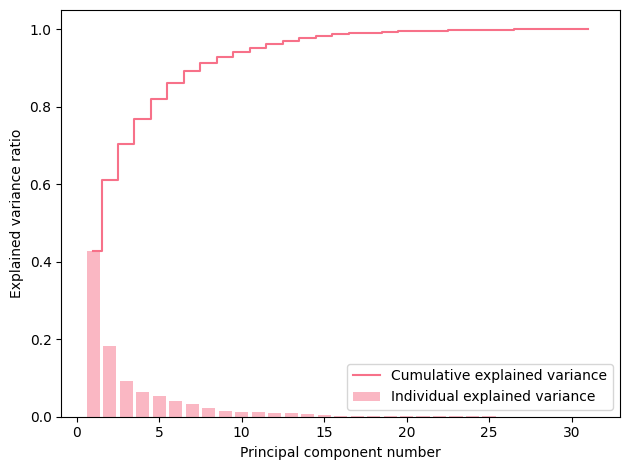

In [46]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
exp_var_pca = pca.explained_variance_ratio_

cum_sum = np.cumsum(exp_var_pca)

plt.bar(range(1,len(exp_var_pca)+1),
        exp_var_pca,
        alpha=0.5,
        align='center',
        label='Individual explained variance')
plt.step(range(1,len(cum_sum)+1),
         cum_sum,
         where = 'mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component number')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Независисый анализ компонентов (Independent Component Analysis, ICA)

In [55]:
fast_ica = FastICA(n_components=2)
X_ica = fast_ica.fit_transform(X_scaled)

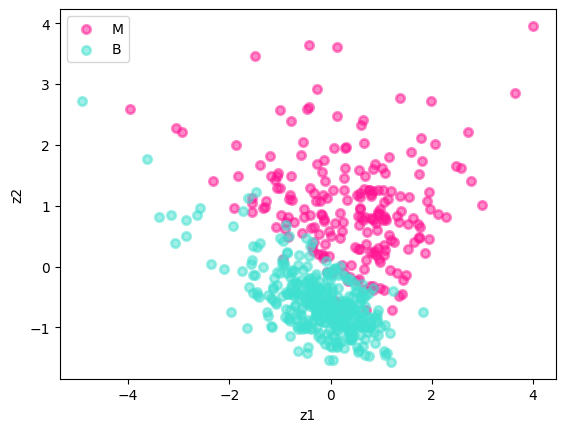

In [56]:
lw = 2

for color, i in zip(colors, [0, 1]):
    plt.scatter(
        X_ica[y == i, 0], X_ica[y == i, 1], color=color, alpha=0.5, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel('z1')
plt.ylabel('z2')
plt.show()

# Нелинейные методы:

## Kernel PCA

In [63]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_rbf = rbf_pca.fit_transform(X_scaled)

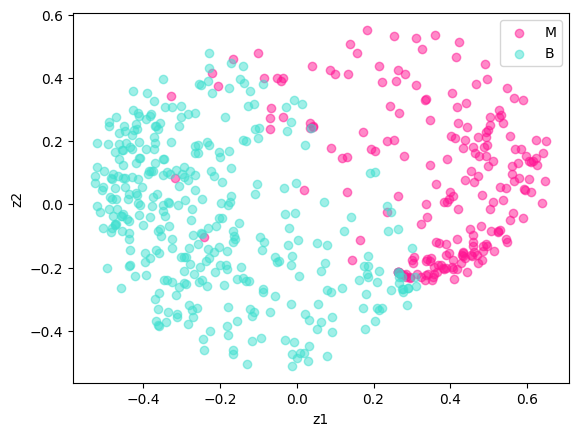

In [64]:
for i, label in enumerate(['B', 'M']):
    plt.scatter(X_rbf[y == i, 0], X_rbf[y == i, 1],
                c=colors[i], label=vals[i], alpha=0.5)

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel('z1')
plt.ylabel('z2')
plt.show()

## tSNE

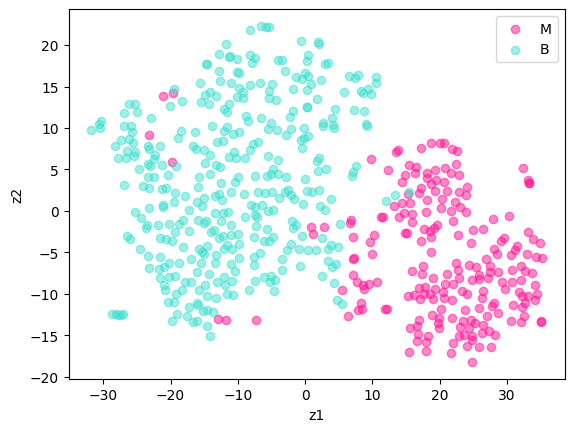

In [77]:
# сначала посмотрим с дефолтной перплексией = 30
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

for i, label in enumerate(vals):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1],
                c=colors[i], label=label, alpha=0.5)

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel('z1')
plt.ylabel('z2')
plt.show()

In [85]:
# Вывод результатов
print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_tsne.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)

Initial Shape of X:  (569, 31)
New Shape of X:  (569, 2)
Kullback-Leibler divergence after optimization:  0.8043444156646729
No. of iterations:  999


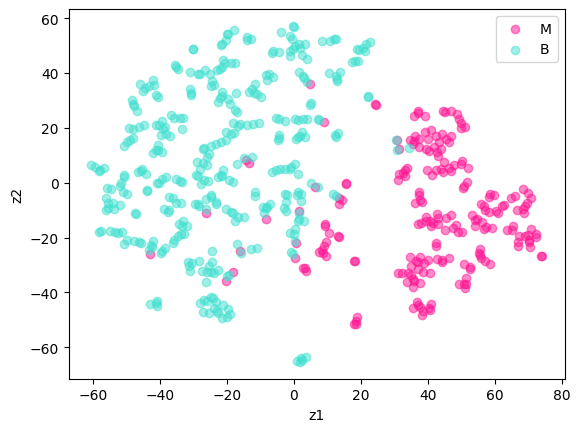

In [80]:
# сравним с маленьким значением перплексии (5)
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X_scaled)

for i, label in enumerate(vals):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1],
                c=colors[i], label=label, alpha=0.5)

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel('z1')
plt.ylabel('z2')
plt.show()

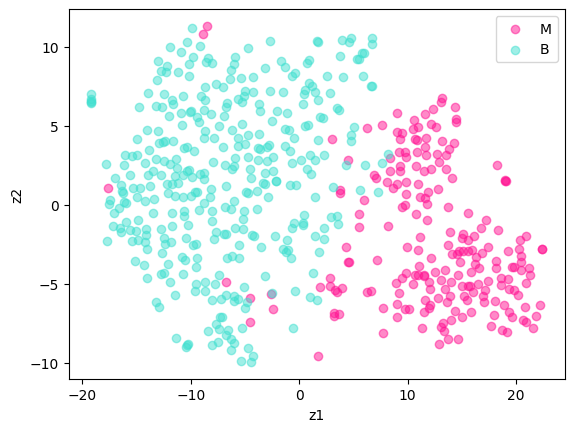

In [83]:
# сравним с большим значением перплексии (50)
tsne = TSNE(n_components=2, perplexity=50)
X_tsne = tsne.fit_transform(X_scaled)

for i, label in enumerate(vals):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1],
                c=colors[i], label=label, alpha=0.5)

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel('z1')
plt.ylabel('z2')
plt.show()

## DBSCAN для кластеризации

In [108]:
dbscan_cluster1 = DBSCAN(eps = 0.5, min_samples = 82)
X_new = dbscan_cluster1.fit(X_scaled)

In [109]:
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 0
Estimated no. of noise points: 569
v_measure = 0.0


При eps = 0.5, min_samples = 8 не нашелся ни один кластер.


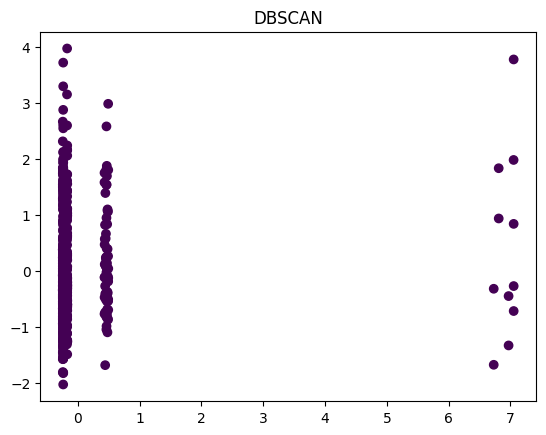

In [110]:
X_sc = pd.DataFrame(X_scaled)
cols = X_sc.columns[:2]

plt.scatter(X_sc[cols[0]], X_sc[cols[1]],c=labels)
plt.title('DBSCAN')
plt.show()

Чтобы правильно опрделить число eps, воспользуемся правилом локтя.

In [111]:
from sklearn.neighbors import NearestNeighbors

min_samples = 32

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X_scaled)

dists, inds = knn.kneighbors(X_scaled)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

In [112]:
import sklearn
#возможные метрики расстояния
sklearn.metrics.pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

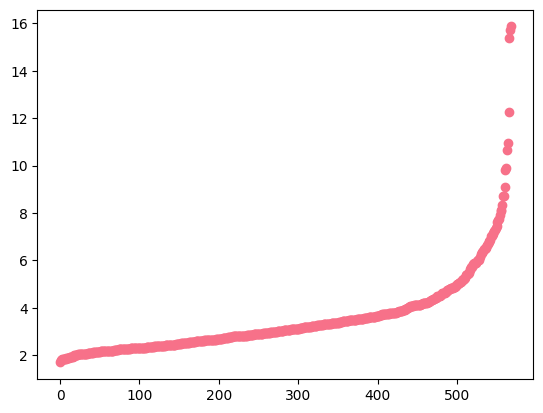

In [113]:
plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.show()

eps = 4

In [119]:
eps=4
min_samples=4
dbscan_cluster1 = DBSCAN(eps = eps, min_samples = min_samples)
X_new = dbscan_cluster1.fit(X_scaled)

# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 2
Estimated no. of noise points: 48
v_measure = 0.02666668668842127


Нашлось 2 кластера, меньше шумов, V-мера теперь не равна нулю

# DBSCAN для определения выбросов

In [120]:
dbscan = DBSCAN(eps = eps, min_samples = min_samples)
print(dbscan)

DBSCAN(eps=4, min_samples=4)


In [121]:
pred = dbscan.fit_predict(X_scaled)

In [122]:
# у анномалий - класс -1, ищем все номера строк с таким классом, потом отбираем эти строки из начального набора данных
anom_index = [i for i in range(len(pred)) if pred[i] == -1]

values = X_sc.loc[anom_index]

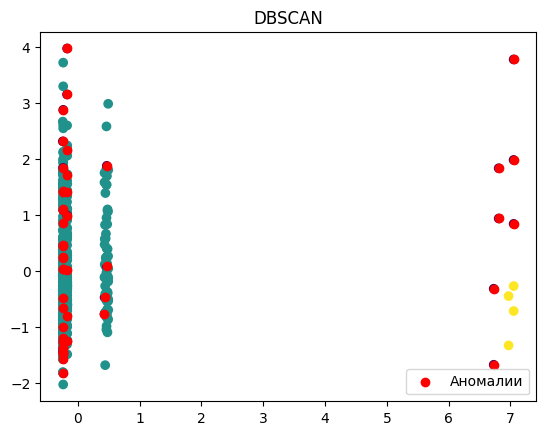

In [75]:
plt.scatter(X_sc[cols[0]], X_sc[cols[1]],c=dbscan.labels_)
plt.scatter(values[cols[0]], values[cols[1]], color='r', label='Аномалии')
plt.title('DBSCAN')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.show()